In [1]:
import cv2
import numpy as np

In [2]:
cap1 = cv2.VideoCapture(0)
cap2 = cv2.VideoCapture(1)

In [3]:
i = 10

while cap1.isOpened() and cap2.isOpened() :
    success1, image1 = cap1.read()
    success2, image2 = cap2.read()

    if not success1 or not success2 :
        print(image1, image2)
        print('video read failed.')
        break

    image1 = cv2.resize(image1, (640, 480))
    image2 = cv2.resize(image2, (640, 480))


    cv2.imshow('2 cameras', np.hstack((image1, image2)))
    i -= 1
    if(i==0):
        break
    if cv2.waitKey(1) == ord('q') : 
        break

cv2.destroyAllWindows()

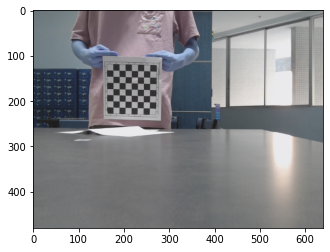

In [4]:
import matplotlib.pyplot as plt
plt.imshow(image1)
plt.show()

In [4]:
import cv2
import numpy as np

# Define the number of corners in the calibration pattern (inner corners)
pattern_size = (7, 7)  # Modify this according to your calibration pattern

# Create the calibration pattern points
calibration_pattern_points = np.zeros((pattern_size[0] * pattern_size[1], 3), np.float32)
calibration_pattern_points[:, :2] = np.mgrid[0:pattern_size[0], 0:pattern_size[1]].T.reshape(-1, 2)

# Arrays to store object points and image points from all calibration images
object_points = []  # 3D points of the calibration pattern
image_points_left = []  # 2D points in the left camera image
image_points_right = []  # 2D points in the right camera image

left_image = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
right_image = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)

# Find corners in the calibration pattern for both cameras
ret_left, corners_left = cv2.findChessboardCorners(left_image, pattern_size)
ret_right, corners_right = cv2.findChessboardCorners(right_image, pattern_size)

# If corners are found, add object points and image points to the lists
if ret_left and ret_right:
    object_points.append(calibration_pattern_points)
    image_points_left.append(corners_left)
    image_points_right.append(corners_right)

# Camera calibration for left camera
ret_left, left_camera_matrix, left_distortion_coeffs, _, _ = cv2.calibrateCamera(
    object_points,
    image_points_left,
    left_image.shape[::-1],
    None,
    None
)

# Camera calibration for right camera
ret_right, right_camera_matrix, right_distortion_coeffs, _, _ = cv2.calibrateCamera(
    object_points,
    image_points_right,
    right_image.shape[::-1],
    None,
    None
)

# Perform stereo calibration
ret, left_camera_matrix, left_distortion_coeffs, right_camera_matrix, right_distortion_coeffs, rotation_matrix, translation_vector, essential_matrix, fundamental_matrix = cv2.stereoCalibrate(
    object_points,
    image_points_left,
    image_points_right,
    left_camera_matrix,
    left_distortion_coeffs,
    right_camera_matrix,
    right_distortion_coeffs,
    left_image.shape[::-1],  # Size of the calibration images
    flags=cv2.CALIB_FIX_INTRINSIC
)

# Compute the rectification and projection matrices
rectification_matrix_left, rectification_matrix_right, projection_matrix_left, projection_matrix_right, _, _, _ = cv2.stereoRectify(
    left_camera_matrix,
    left_distortion_coeffs,
    right_camera_matrix,
    right_distortion_coeffs,
    left_image.shape[::-1],  # Size of the calibration images
    rotation_matrix,
    translation_vector,
    alpha=0  # Set alpha=0 for the default rectification
)

# Print the camera calibration parameters
print("Left Camera Matrix:\n", left_camera_matrix)
print("Right Camera Matrix:\n", right_camera_matrix)
print("Left Distortion Coefficients:\n", left_distortion_coeffs)
print("Right Distortion Coefficients:\n", right_distortion_coeffs)
print("Rotation Matrix:\n", rotation_matrix)
print("Translation Vector:\n", translation_vector)
print("Rectification Matrix (Left):\n", rectification_matrix_left)
print("Rectification Matrix (Right):\n", rectification_matrix_right)
print("Projection Matrix (Left):\n", projection_matrix_left)
print("Projection Matrix (Right):\n", projection_matrix_right)

Left Camera Matrix:
 [[662.08000264   0.         366.04327775]
 [  0.         658.97655913 308.56849407]
 [  0.           0.           1.        ]]
Right Camera Matrix:
 [[1.51112791e+03 0.00000000e+00 3.24984633e+02]
 [0.00000000e+00 1.54029089e+03 2.23242809e+02]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00]]
Left Distortion Coefficients:
 [[-0.34986741  0.74405956 -0.01513489 -0.04322675 -0.71819252]]
Right Distortion Coefficients:
 [[ 3.53050785e+00 -2.77080092e+01  1.21257411e-01 -7.02448665e-02
  -1.59357585e+03]]
Rotation Matrix:
 [[ 9.99949217e-01  1.00459030e-02  8.01924111e-04]
 [-9.94858060e-03  9.71287127e-01  2.37702213e-01]
 [ 1.60903480e-03 -2.37698120e-01  9.71337745e-01]]
Translation Vector:
 [[16.08473114]
 [-3.8977749 ]
 [70.26096635]]
Rectification Matrix (Left):
 [[ 0.22492197 -0.2815749   0.93280528]
 [ 0.16416661  0.95460072  0.24856948]
 [-0.96044752  0.09722674  0.26093587]]
Rectification Matrix (Right):
 [[ 0.22282992 -0.05399785  0.9733607 ]
 [ 0.17394743  

In [11]:
import matplotlib.pyplot as plt

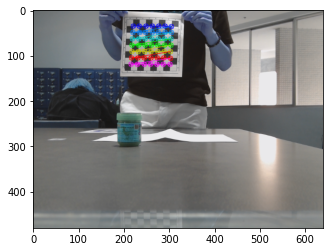

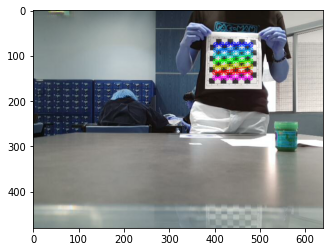

In [13]:
tmp1 = image1.copy()
cv2.drawChessboardCorners(tmp1, pattern_size, corners_left, bool(ret_left))

# Display the image with corners
plt.imshow(tmp1)
plt.show()

tmp2 = image2.copy()
cv2.drawChessboardCorners(tmp2, pattern_size, corners_right, bool(ret_right))

# Display the image with corners
plt.imshow(tmp2)
plt.show()

In [22]:
print(left_camera_matrix)


[[662.08000264   0.         366.04327775]
 [  0.         658.97655913 308.56849407]
 [  0.           0.           1.        ]]


In [5]:
import cv2
import numpy as np

# Baseline distance between the cameras (in meters)
baseline = 0.297 #A4 paper

# Rectify stereo images
left_map = cv2.initUndistortRectifyMap(
    left_camera_matrix,
    left_distortion_coeffs,
    rectification_matrix_left,
    projection_matrix_left,
    left_image.shape[::-1],
    cv2.CV_32FC1
)
right_map = cv2.initUndistortRectifyMap(
    right_camera_matrix,
    right_distortion_coeffs,
    rectification_matrix_right,
    projection_matrix_right,
    right_image.shape[::-1],
    cv2.CV_32FC1
)

left_image_rectified = cv2.remap(left_image, left_map[0], left_map[1], cv2.INTER_LINEAR)
right_image_rectified = cv2.remap(right_image, right_map[0], right_map[1], cv2.INTER_LINEAR)

# Compute disparity map
window_size = 3  # Adjust this parameter as needed
min_disparity = 0
num_disparities = 16 * 5  # Adjust this parameter as needed
stereo = cv2.StereoSGBM_create(minDisparity=min_disparity,
                               numDisparities=num_disparities,
                               blockSize=window_size)
disparity_map = stereo.compute(left_image_rectified, right_image_rectified)


# Expand projection matrix to size (4, 4)
Q = np.zeros((4, 4), dtype=np.float32)
Q[:3, :4] = projection_matrix_left

# Calculate 3D coordinates
points_3d = cv2.reprojectImageTo3D(disparity_map, Q)

In [6]:
i = 10

while cap1.isOpened() and cap2.isOpened() :
    success1, i1 = cap1.read()
    success2, i2 = cap2.read()

    if not success1 or not success2 :
        print(i1, i2)
        print('video read failed.')
        break

    i1 = cv2.resize(i1, (640, 480))
    i2 = cv2.resize(i2, (640, 480))


    cv2.imshow('2 cameras', np.hstack((i1, i2)))
    i -= 1
    if(i==0):
        cv2.imwrite('i1.jpg',i1)
        cv2.imwrite('i2.jpg',i2)
        break
    if cv2.waitKey(1) == ord('q') : 
        break

cv2.destroyAllWindows()

In [23]:
real_world_coordinates = []
exoskeleton_points_left = [(192, 228), (242, 228), (238, 296), (191, 295)]
exoskeleton_points_right = [(525, 248), (573, 248), (570,308), (527,306)]

for (x_left, y_left), (x_right, y_right) in zip(exoskeleton_points_left, exoskeleton_points_right):
    disparity = disparity_map[y_left, x_left]

    if disparity  > 0:
        depth = baseline * 660 / disparity
        real_world_x = (x_left + x_right) / 2
        real_world_y = (y_left + y_right) / 2
        real_world_z = depth
        real_world_coordinates.append((real_world_x, real_world_y, real_world_z))
print(real_world_coordinates)

[(358.5, 238.0, 0.15507911392405063), (407.5, 238.0, 0.15507911392405063), (404.0, 302.0, 0.15507911392405063), (359.0, 300.5, 0.15507911392405063)]


In [8]:
# Retrieve real-world coordinates for exoskeleton points
# real_world_coordinates = []
# for (x, y) in exoskeleton_points:
#     disparity = disparity_map[y, x]
#     if disparity > 0:
#         point_3d = points_3d[y, x]
#         real_world_coordinate = (
#             point_3d[0] / 1000.0,  # Convert from millimeters to meters
#             point_3d[1] / 1000.0,
#             point_3d[2] / 1000.0
#         )
#         real_world_coordinates.append(real_world_coordinate)

# # Display the real-world coordinates
# for coordinate in real_world_coordinates:
#     print(coordinate)

NameError: name 'exoskeleton_points' is not defined

In [9]:
# Import neccessary libraries
import mediapipe as mp
from mediapipe.tasks import python
from mediapipe.tasks.python import vision
import cv2
import os
import traceback

In [10]:
# create an HandLandmarker object.
BaseOptions = mp.tasks.BaseOptions
HandLandmarker = mp.tasks.vision.HandLandmarker
HandLandmarkerOptions = mp.tasks.vision.HandLandmarkerOptions
VisionRunningMode = mp.tasks.vision.RunningMode

# Create a hand landmarker instance with the image mode:
options = HandLandmarkerOptions(
    base_options=BaseOptions(model_asset_path='models/hand_landmarker.task'),
    running_mode=VisionRunningMode.IMAGE,
    num_hands=1,
)


In [11]:
# Initialize the hand landmarker instancea and run inference:
landmarker = HandLandmarker.create_from_options(options) 

In [12]:
last_normalized_landmarks = []
last_world_landmarks = []

In [13]:
from onlaweng_utils import draw_landmarks as onlaweng_draw_hands

In [20]:
# cap1 = cv2.VideoCapture(0)
# cap2 = cv2.VideoCapture(1)

focal_length = 1936.89

while cap1.isOpened() and cap2.isOpened():
    success1, p1 = cap1.read()
    success2, p2 = cap2.read()
    if not success1 or not success2:
        print("Ignoring empty camera frame.")
        continue

    # Flip the image horizontally for a later selfie-view display, and convert
    # the BGR image to RGB.
    p1 = cv2.cvtColor(cv2.flip(p1, 1), cv2.COLOR_BGR2RGB)
    p2 = cv2.cvtColor(cv2.flip(p2, 1), cv2.COLOR_BGR2RGB)

    # To improve performance, optionally mark the image as not writeable to
    # pass by reference.
    p1.flags.writeable = False
    mp_img1 = mp.Image(image_format=mp.ImageFormat.SRGB, data=p1)
    results1 = landmarker.detect(mp_img1)

    p2.flags.writeable = False
    mp_img2 = mp.Image(image_format=mp.ImageFormat.SRGB, data=p2)
    results2 = landmarker.detect(mp_img2)

    # # Draw the hand annotations on the image.
    p1.flags.writeable = True
    p1 = cv2.cvtColor(p1, cv2.COLOR_RGB2BGR)

    p2.flags.writeable = True
    p2 = cv2.cvtColor(p2, cv2.COLOR_RGB2BGR)

    #print(results)
    try :
        # # capture if the most present hand is right hand
        if not results1.hand_landmarks or not (results1.handedness[0][0].category_name == 'Right'):
            continue
        #     last_normalized_landmarks1 = results1.hand_landmarks[0]
        #     last_world_landmarks1 = results1.hand_world_landmarks[0]

        #     # # mimic the datatype
        #     # landmark_proto_mimic = LandmarkListPbMessageMimic(results.hand_landmarks[0])

        #     # # draw the landmarks
        #     # mp.solutions.drawing_utils.draw_landmarks(
        #     #     image, landmark_proto_mimic, mp.solutions.hands.HAND_CONNECTIONS)

        #     onlaweng_draw_hands(p1, results1.hand_landmarks[0], mp.solutions.hands.HAND_CONNECTIONS)
        
        if not results2.hand_landmarks or not (results2.handedness[0][0].category_name == 'Right'):
            continue
        #     last_normalized_landmarks2 = results2.hand_landmarks[0]
        #     last_world_landmarks2 = results2.hand_world_landmarks[0]

        #     # # mimic the datatype
        #     # landmark_proto_mimic = LandmarkListPbMessageMimic(results.hand_landmarks[0])

        #     # # draw the landmarks
        #     # mp.solutions.drawing_utils.draw_landmarks(
        #     #     image, landmark_proto_mimic, mp.solutions.hands.HAND_CONNECTIONS)

        #     onlaweng_draw_hands(p2, results2.hand_landmarks[0], mp.solutions.hands.HAND_CONNECTIONS)

        # Get exoskeleton point coordinates
        exoskeleton_points_left = [(lm.x, lm.y) for lm in results1.hand_world_landmarks[0]]
        exoskeleton_points_right = [(lm.x, lm.y) for lm in results2.hand_world_landmarks[0]]

        # Retrieve real-world coordinates for exoskeleton points
        real_world_coordinates = []
        for (x_left, y_left), (x_right, y_right) in zip(exoskeleton_points_left, exoskeleton_points_right):
            disparity = disparity_map[y_left, x_left]

            if disparity  > 0:
                depth = baseline * focal_length / disparity
                real_world_x = (x_left + x_right) / 2
                real_world_y = (y_left + y_right) / 2
                real_world_z = depth
                real_world_coordinates.append((real_world_x, real_world_y, real_world_z))
            print(real_world_coordinates)
            break

    except Exception as e:
        print(traceback.format_exc())
        break


    cv2.imshow('2 cameras', np.hstack((p1, p2)))
    if cv2.waitKey(5) == ord('q'):
        break

# cap.release()
cv2.destroyAllWindows()

c:\Users\bbom\AppData\Local\Programs\Python\Python39\lib\site-packages\google\protobuf\symbol_database.py:78: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


Traceback (most recent call last):
  File "C:\Users\bbom\AppData\Local\Temp\ipykernel_29240\3908911955.py", line 73, in <module>
    disparity = disparity_map[y_left, x_left]
IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices



In [ ]:
# Get exoskeleton point coordinates
exoskeleton_points_left = [(x, y) for (x, y, _) in exoskeleton_points_list_left]
exoskeleton_points_right = [(x, y) for (x, y, _) in exoskeleton_points_list_right]

# Retrieve real-world coordinates for exoskeleton points
real_world_coordinates = []
for (x_left, y_left), (x_right, y_right) in zip(exoskeleton_points_left, exoskeleton_points_right):
    disparity_left = disparity_map_left[y_left, x_left]
    disparity_right = disparity_map_right[y_right, x_right]
    if disparity_left > 0 and disparity_right > 0:
        depth_left = baseline * focal_length / disparity_left
        depth_right = baseline * focal_length / disparity_right
        real_world_x = (x_left + x_right) / 2
        real_world_y = (y_left + y_right) / 2
        real_world_z = (depth_left + depth_right) / 2
        real_world_coordinates.append((real_world_x, real_world_y, real_world_z))